## Семинар 4: "Сверточные сети"

ФИО: Дорожинский Владислав Игоревич

In [2]:
import numpy as np
from sklearn.datasets import fetch_mldata
import torch
from torch import nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
import sys
%matplotlib inline

### Часть 1: Свертка

#### Одномерные сигналы
Начнем с одномерных сигналов — например, это могут быть различные временные ряды. 

<i>1.1 Реализуйте функцию, вычисляющую одномерную свертку.</i>

In [3]:
def t_convolve(signal, kernel):
    signal_convolved = np.zeros(len(signal)-len(kernel)+1)
    # 1. не забудьте перевернуть ядро!
    # 2. необходимо реализовать свертку без отступов, т.е. 
    #   размер результирующего сигнала должен быть меньше входного.
    
    ##### YOUR CODE HERE #####
    k = kernel[::-1]
    ks = len(k)
    for i in range(len(signal_convolved)):
        signal_convolved[i] = np.dot(signal[i:i+ks], k)
    return signal_convolved

Проверим правильность реализации, сравнив с реализацией из scipy

In [4]:
from scipy.signal import convolve

signal = np.random.rand(100)
kernel = np.random.rand(5)
t_result = t_convolve(signal, kernel)
b_result = convolve(signal, kernel, mode='valid')

np.testing.assert_allclose(t_result, b_result)

Посмотрим как операция свертки может помочь нам убрать шум из сигнала

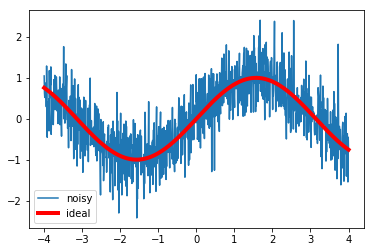

In [5]:
x = np.linspace(-4, 4, 1000)
signal = np.sin(x)
noisy_signal = signal + np.random.randn(signal.shape[0])*0.5
plt.plot(x, noisy_signal, label='noisy')
plt.plot(x, signal, 'r', label='ideal', linewidth=4)
plt.legend(loc=0)

Для подавления шума можно использовать усреднение значений сигнала в окрестности каждой точки (см. ЗБЧ). Вы можете убедиться, что такая операция может быть реализована при помощи свертки данных с ядром, $[\frac 1w, \frac 1w, ..., \frac 1w]$, где $w$ — размер окна.

<i>1.2  Вычислите свертку <b>зашумленного</b> сигнала с ядром $[0.2, 0.2, 0.2, 0.2, 0.2]$ </i>

In [8]:
kernel_size = 21
denoised_signal = t_convolve(noisy_signal, (1/kernel_size,)*kernel_size)

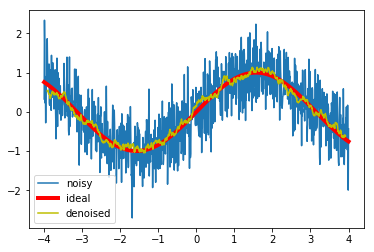

In [10]:
x = np.linspace(-4, 4, 1000)
signal = np.sin(x)
noisy_signal = signal + np.random.randn(signal.shape[0])*0.5
plt.plot(x, noisy_signal, label='noisy')
plt.plot(x, signal, 'r', label='ideal', linewidth=4)
plt.plot(x[(kernel_size//2):-(kernel_size//2)], denoised_signal, 'y', label='denoised')
plt.legend(loc=0)

Заметим, что уровень шума значительно снизился! Попробуйте подобрать такую ширину окна, чтобы востановленный сигнал был наиболее похож на исходный.

<i> 1.3 Подберите размер окна <i>

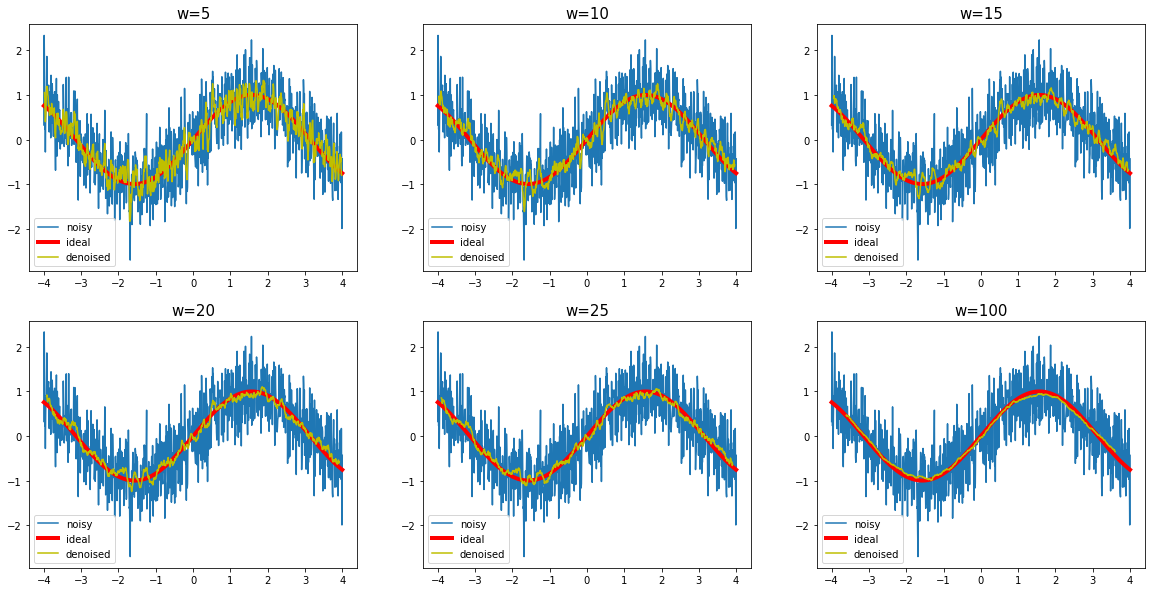

In [12]:
plt.figure(figsize=(20, 10))
for i, w in enumerate([5, 10, 15, 20, 25, 100]):
    plt.subplot(2, 3, i+1)
    kernel = np.array([1./w]*w)
    denoised_signal = t_convolve(noisy_signal, kernel)
    plt.plot(x, noisy_signal, label='noisy')
    plt.plot(x, signal, 'r', label='ideal', linewidth=4)
    plt.plot(x[(w-1)//2:-(w-1)//2], denoised_signal, 'y', label='denoised')
    plt.title('w={}'.format(w), fontsize=15)
    plt.legend(loc=0)

#### Многомерные сигналы
Перейдем теперь к черно-белым и цветным изображениям. Для ЧБ изображений имеем двумерный сигнал, для цветных — трехмерный (высота x ширина x каналы).

Для цветных изображений количество каналов ядра обычно совпадает с количеством каналов изображения. Таким образом, в результате получается черно-белое изображение.

<i>Для вычисления многомерных сверток используйте функцию convolve из from scipy.signal import convolve</i>

/home/user/Documents/MachineLearning/mlenv/lib/python3.5/site-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/home/user/Documents/MachineLearning/mlenv/lib/python3.5/site-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


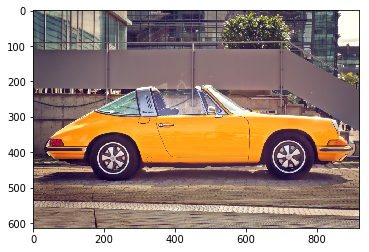

In [18]:
from scipy.misc import imresize
image = plt.imread('photo.jpeg')
image = imresize(image, 0.2)
plt.imshow(image)

<i>1.4 Найдите в вашей любимой поисковой системе веса каналов для перевода цветного изображения в черно-белое. Постройте фильтр, который будет переводить цветное изображение в ЧБ</i>

In [28]:
color_to_bw = np.array([0.2989, 0.5870, 0.1140][::-1])
bw_kernel = color_to_bw.reshape(1, 1, 3)

<i>1.5 На примере любого цветного изображения покажите результат его свертки с фильтром из предыдущего задания.</i>

/home/user/Documents/MachineLearning/mlenv/lib/python3.5/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/home/user/Documents/MachineLearning/mlenv/lib/python3.5/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


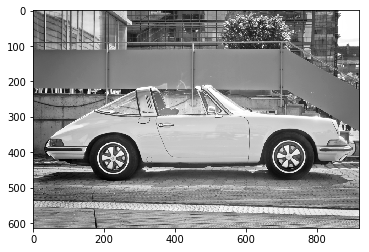

In [31]:
bw_image = convolve(image, bw_kernel, mode='valid')
# Не забудьте, что размер bw_image должен быть [w,h], а convolve вам вернет [w,h,1]
plt.imshow(bw_image[:,:,0], cmap=plt.cm.Greys_r)

Операция свертки также позволяет находить границы на изображении. Для этого можно использовать, например, фильтр Собеля.

<i>1.6 Задайте ядро <a href="https://ru.wikipedia.org/wiki/Оператор_Собеля">фильтра Собеля</a> и продемонстрируйте результат его применения к любому цветному изображению.</i>

In [32]:
Kx = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
Ky = Kx.T
Gx = convolve(image, Kx[:, :, None], mode='valid').sum(2)
Gy = convolve(image, Ky[:, :, None], mode='valid').sum(2)

/home/user/Documents/MachineLearning/mlenv/lib/python3.5/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/home/user/Documents/MachineLearning/mlenv/lib/python3.5/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


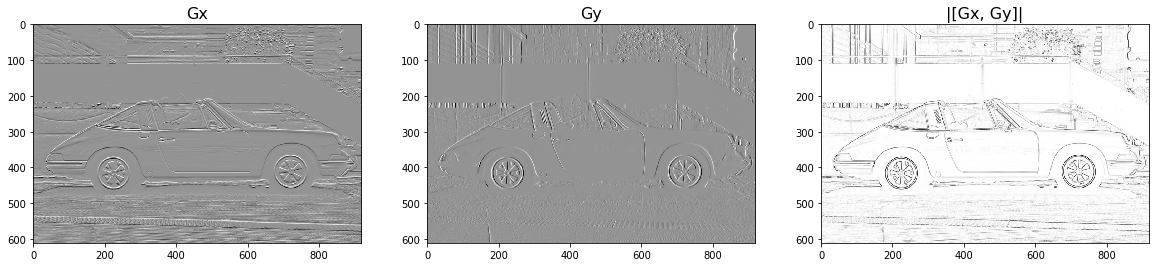

In [33]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(Gx, cmap=plt.cm.Greys)
plt.title('Gx', fontsize=16)
plt.subplot(1, 3, 2)
plt.imshow(Gy, cmap=plt.cm.Greys)
plt.title('Gy', fontsize=16)

edges = np.sqrt(Gx**2+Gy**2)
plt.subplot(1, 3, 3)
plt.imshow(edges, cmap=plt.cm.Greys)
plt.title('|[Gx, Gy]|', fontsize=16)

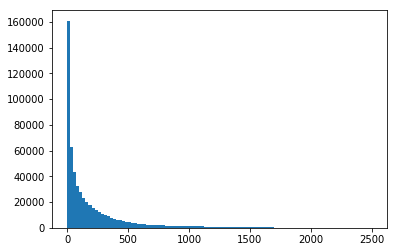

In [34]:
plt.hist(edges.ravel(), bins=100)
plt.show()

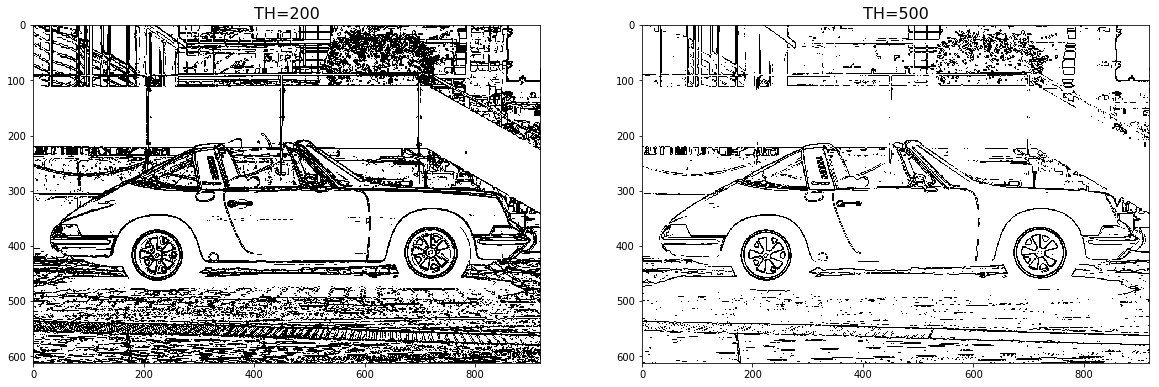

In [39]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(edges > 200, cmap=plt.cm.Greys)
plt.title('TH=200', fontsize=16)
plt.subplot(1, 2, 2)
plt.imshow(edges > 500, cmap=plt.cm.Greys)
plt.title('TH=500', fontsize=16)

В сверточных нейронных сетях каждый слой использует несколько фильтров. Допустим, у нас было изображение с тремя каналами (количество входных каналов). Рассмотрим банк из четырех фильтров (количество выходных каналов). Тогда изначально будет вычислена свертка с каждым фильтром — получим 4 ЧБ изображения. Теперь соединим их в одно, интерпретируя каждое ЧБ изображение как канал цветного: RGB$\alpha$.

<i>1.7 Реализуйте операцию свертки с банком фильтров (filter bank).</i>

In [40]:
def t_convolve_bank(signal, kernel):
    assert signal.ndim == kernel.ndim - 1
    ##### YOUR CODE HERE #####
    n_channels = kernel.shape[0]
    sh = list(signal.shape)
    sh[-1] = n_channels
    result = np.empty(sh)
    for i, k in enumerate(kernel):
        result[:,:,i] = convolve(signal, k, mode='valid')[:,:,0]
    return result.astype('uint8')

<i>1.8 Задайте банк фильтров, меняющий порядок следования каналов с RGB на BGR.</i>

In [41]:
##### YOUR CODE HERE #####
rgb2bgr = np.array([ # N
    [[ # HW
        [1,0,0] # C (inverse?)
    ]],
    [[
        [0,1,0]
    ]],
    [[
        [0,0,1]
    ]],
])

<i>1.9 Продемонстрируйте результат свертки любого цветного изображения с банком фильтров из предыдущего пункта.</i>

/home/user/Documents/MachineLearning/mlenv/lib/python3.5/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/home/user/Documents/MachineLearning/mlenv/lib/python3.5/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


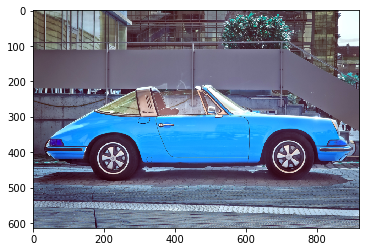

In [45]:
##### YOUR CODE HERE #####
# Не забудьте, что после свертки вы скорее всего получите тензор типа float. 
# Чтобы imshow нормально отобразил результат, надо привести его к типу uint8 (нпр., при помощи .astype('uint8'))
rgb2bgr_img = t_convolve_bank(image, rgb2bgr)

plt.imshow(rgb2bgr_img)

В процессе обучения сверточных нейронных сетей настраиваются веса элементов фильтр банка. Это позволяет не заниматься подбором коэффициентов "руками", а задавать лишь размер ядра: ширину, высоту, количество входных и выходных каналов. В итоге получаем четырехмерный массив (тензор).

### Часть 2: Пулинг

При использовании сверточных слоев принято использовать слои пулинга. Эта операция позволяет уменьшить пространственные размерности изображения и избавиться от избыточности.

<i>2.1 Реализуйте операции пулинга для цветных изображений</i>

In [46]:
def maxpool(image):
    assert(image.ndim == 3)
    ##### YOUR CODE HERE #####
    sh = list(image.shape)
    sh[0] //= 2
    sh[1] //= 2
    result = np.empty(sh)
    for h in range(image.shape[0]//2):
        for w in range(image.shape[1]//2):
            for c in range(image.shape[2]):
                result[h,w,c] = np.max(image[2*h:2*h+2, 2*w:2*w+2, c])
    return result.astype('uint8')

def medianpool(image):
    assert(image.ndim == 3)
    ##### YOUR CODE HERE #####
    sh = list(image.shape)
    sh[0] //= 2
    sh[1] //= 2
    result = np.empty(sh)
    for h in range(image.shape[0]//2):
        for w in range(image.shape[1]//2):
            for c in range(image.shape[2]):
                result[h,w,c] = np.mean(image[2*h:2*h+2, 2*w:2*w+2, c])
    return result.astype('uint8')

Как и в первой части, посмотрим сначала как эта опреация влияет на цветные изображения.

<i>2.2 Взять цветное изображение и добавить к нему <a href="https://ru.wikipedia.org/wiki/Salt_and_pepper"> шум соль и перец</a>. Применить медианный пулинг и максимальный пулинг.</i>

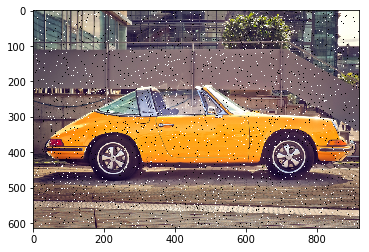

In [47]:
N_dots = 10000
white_y = np.random.randint(0, image.shape[0], N_dots)
white_x = np.random.randint(0, image.shape[1], N_dots)

black_y = np.random.randint(0, image.shape[0], N_dots)
black_x = np.random.randint(0, image.shape[1], N_dots)

image_noised = image.copy()
image_noised[white_y, white_x] = [255, 255, 255]
image_noised[black_y, black_x] = [0, 0, 0]

plt.imshow(image_noised)

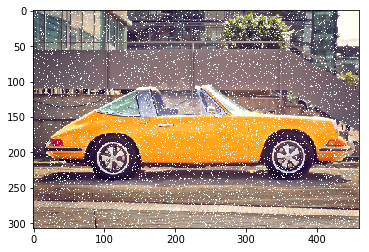

In [49]:
# MAX
maxpooled = maxpool(image_noised)
plt.imshow(maxpooled)

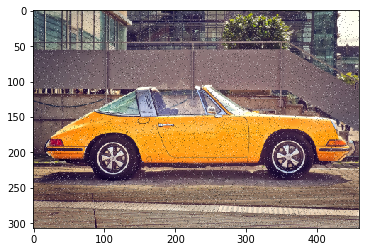

In [50]:
# MEDIAN
medianpooled = medianpool(image_noised)
plt.imshow(medianpooled)

<i>2.3 Какой тип пулинга лучше справился с поставленной задачей? Почему?</i>

MaxPooling полностью убирает перец, но усиливает соль.

MedianPooling одинаково хорошо убирает как соль так и перец.

### Часть 3: Сверточная сеть на pyTorch

pyTorch предоставляет модули свертки и пулинга. Попробуем построить сеть и натренировать ее на данных MNIST. Для загрузки данных воспользуйтесь кодом со второго семинара.

Воспользуемся кодом с предыдущего семинара, чтобы обучить сверточную сеть на данных MNIST. Попробуем две архитектуры: 
2. input -> 8 Conv 3x3 -> ReLU -> maxpool -> 16 Conv 3x3 -> ReLU -> ravel -> Linear -> LogSoftmax
1. input -> 8 Conv 3x3 -> ReLU -> 16 Conv 3x3 -> ReLU -> maxpool -> 32 Conv 3x3 -> ravel -> Linear -> LogSoftmax

Здесь запись "c conv KxK" означает то, что на выходе должно получиться c каналов, а размер ядра — KxK

Ниже приведен пример сети. <i>(Документация: http://pytorch.org/docs/)</i>

In [105]:
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])
train_dataset = MNIST('../data/mnist', train=True, transform=transform)
test_dataset = MNIST('../data/mnist', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=1024, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=True)

In [174]:
class ConvClassifierType1(nn.Module):
    def __init__(self):
        super(ConvClassifierType1, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 8, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(8, 16, 3, padding=1),
            nn.ReLU(),
        )
        self.linear_layers = nn.Sequential(nn.Linear(14*14*16, 10), nn.LogSoftmax(dim=1))
    
    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.shape[0], -1)
        x = self.linear_layers(x)
        return x
    
class ConvClassifierType2(nn.Module):
    def __init__(self):
        super(ConvClassifierType2, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 8, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(8, 16, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 3, padding=1),
            nn.ReLU(),
        )
        self.linear_layers = nn.Sequential(nn.Linear(14*14*32, 10), nn.LogSoftmax(dim=1))
    
    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.shape[0], -1)
        x = self.linear_layers(x)
        return x
    
class ConvClassifierType3(nn.Module):
    def __init__(self):
        super(ConvClassifierType3, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 16, 3, padding=1, bias=False),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.Dropout2d(p=0.5),
            nn.ReLU(),
        )
        self.linear_layers = nn.Sequential(nn.Linear(14*14*64, 10), nn.LogSoftmax(dim=1))
    
    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.shape[0], -1)
        x = self.linear_layers(x)
        return x

In [175]:
def train(network, optimizer, epochs):
    loss = nn.NLLLoss()
    network.cuda()
    train_loss_epochs = []
    test_loss_epochs = []
    train_accuracy_epochs = []
    test_accuracy_epochs = []
    try:
        for epoch in range(epochs):
            losses = []
            accuracies = []
            network.train()
            for X, y in train_loader:
                X = Variable(X).cuda()
                y = Variable(y).cuda()
                network.zero_grad()
                prediction = network(X)
                loss_batch = loss(prediction, y)
                losses.append(loss_batch.data[0])
                loss_batch.backward()
                optimizer.step()
                accuracies.append((np.argmax(prediction.cpu().data.numpy(), 1)==y.cpu().data.numpy()).mean())
            train_loss_epochs.append(np.mean(losses))
            train_accuracy_epochs.append(np.mean(accuracies))
            losses = []
            accuracies = []
            network.eval()
            for X, y in test_loader:
                X = Variable(X).cuda()
                y = Variable(y).cuda()
                prediction = network(X)
                loss_batch = loss(prediction, y)
                losses.append(loss_batch.data[0])
                accuracies.append((np.argmax(prediction.cpu().data.numpy(), 1)==y.cpu().data.numpy()).mean())
            test_loss_epochs.append(np.mean(losses))
            test_accuracy_epochs.append(np.mean(accuracies))
            print('Epoch {0}. (Train/Test) NLL: {1:.4f}/{2:.4f}\tAccuracy: {3:.4f}/{4:.4f}'.format(
                        epoch, train_loss_epochs[-1], test_loss_epochs[-1],
                        train_accuracy_epochs[-1], test_accuracy_epochs[-1]))
    except KeyboardInterrupt:
        pass
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss_epochs, label='Train')
    plt.plot(test_loss_epochs, label='Test')
    plt.xlabel('Epochs', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.legend(loc=0, fontsize=16)
    plt.grid('on')
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracy_epochs, label='Train accuracy')
    plt.plot(test_accuracy_epochs, label='Test accuracy')
    plt.xlabel('Epochs', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.ylim(0.9, 1.0)
    plt.legend(loc=0, fontsize=16)
    plt.grid('on')
    plt.show()

<i>3.1 Обучите сверточные сети с архитектурами (1) и (2). Какое качество удалось получить на тестовой выборке? Какой результат получался на полносвязной нейронной сети?</i>

In [158]:
network = ConvClassifierType1()
optimizer = torch.optim.Adam(network.parameters(), lr=2e-3)

Epoch 0. (Train/Test) NLL: 0.5501/0.1940	Accuracy: 0.8593/0.9444
Epoch 1. (Train/Test) NLL: 0.1517/0.1018	Accuracy: 0.9555/0.9690
Epoch 2. (Train/Test) NLL: 0.0975/0.0782	Accuracy: 0.9717/0.9748
Epoch 3. (Train/Test) NLL: 0.0753/0.0580	Accuracy: 0.9780/0.9828
Epoch 4. (Train/Test) NLL: 0.0609/0.0563	Accuracy: 0.9822/0.9825
Epoch 5. (Train/Test) NLL: 0.0516/0.0529	Accuracy: 0.9848/0.9840
Epoch 6. (Train/Test) NLL: 0.0448/0.0462	Accuracy: 0.9870/0.9832
Epoch 7. (Train/Test) NLL: 0.0406/0.0446	Accuracy: 0.9879/0.9853
Epoch 8. (Train/Test) NLL: 0.0369/0.0469	Accuracy: 0.9888/0.9851
Epoch 9. (Train/Test) NLL: 0.0322/0.0494	Accuracy: 0.9903/0.9849
Epoch 10. (Train/Test) NLL: 0.0311/0.0389	Accuracy: 0.9904/0.9876
Epoch 11. (Train/Test) NLL: 0.0260/0.0383	Accuracy: 0.9921/0.9878
Epoch 12. (Train/Test) NLL: 0.0250/0.0408	Accuracy: 0.9927/0.9873
Epoch 13. (Train/Test) NLL: 0.0238/0.0389	Accuracy: 0.9926/0.9880
Epoch 14. (Train/Test) NLL: 0.0216/0.0420	Accuracy: 0.9935/0.9881
Epoch 15. (Train/Tes

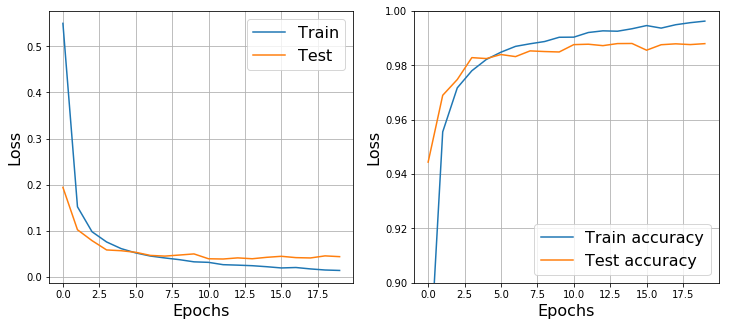

In [159]:
train(network, optimizer, 20)

In [160]:
network = ConvClassifierType2()
optimizer = torch.optim.Adam(network.parameters(), lr=2e-3)

Epoch 0. (Train/Test) NLL: 0.4558/0.1331	Accuracy: 0.8666/0.9605
Epoch 1. (Train/Test) NLL: 0.0959/0.0615	Accuracy: 0.9719/0.9804
Epoch 2. (Train/Test) NLL: 0.0582/0.0448	Accuracy: 0.9826/0.9842
Epoch 3. (Train/Test) NLL: 0.0464/0.0380	Accuracy: 0.9863/0.9875
Epoch 4. (Train/Test) NLL: 0.0370/0.0432	Accuracy: 0.9886/0.9852
Epoch 5. (Train/Test) NLL: 0.0309/0.0387	Accuracy: 0.9903/0.9877
Epoch 6. (Train/Test) NLL: 0.0257/0.0337	Accuracy: 0.9919/0.9891
Epoch 7. (Train/Test) NLL: 0.0224/0.0342	Accuracy: 0.9933/0.9892
Epoch 8. (Train/Test) NLL: 0.0199/0.0360	Accuracy: 0.9939/0.9882
Epoch 9. (Train/Test) NLL: 0.0180/0.0331	Accuracy: 0.9944/0.9886
Epoch 10. (Train/Test) NLL: 0.0133/0.0339	Accuracy: 0.9962/0.9906
Epoch 11. (Train/Test) NLL: 0.0131/0.0342	Accuracy: 0.9958/0.9896
Epoch 12. (Train/Test) NLL: 0.0103/0.0364	Accuracy: 0.9970/0.9897
Epoch 13. (Train/Test) NLL: 0.0100/0.0378	Accuracy: 0.9969/0.9895
Epoch 14. (Train/Test) NLL: 0.0082/0.0418	Accuracy: 0.9976/0.9890
Epoch 15. (Train/Tes

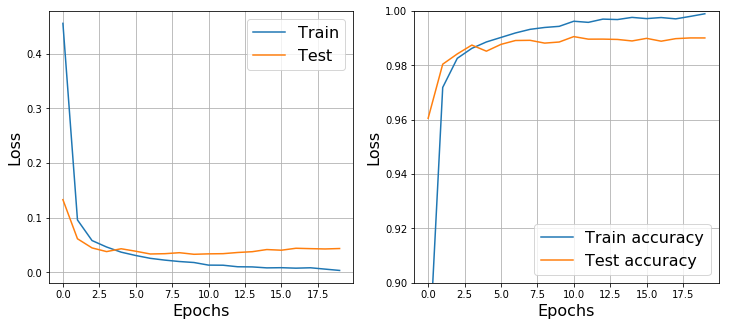

In [161]:
train(network, optimizer, 20)

<i>3.2 На каких объектах сеть ошибается сильнее всего? Нарисуйте эти объекты с правильными и предсказаными метками.</i>

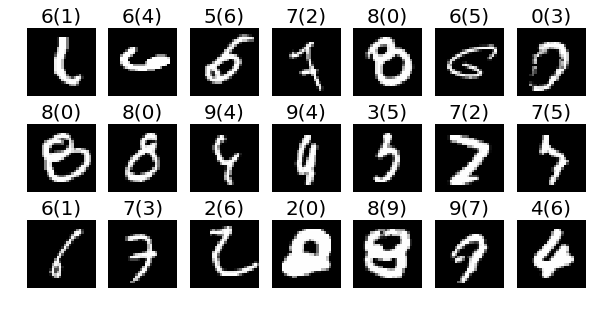

In [182]:
##### YOUR CODE HERE #####

wrong_X = []
correct_y = []
predicted_y = []
logits = []
for X, y in test_loader:
    X = Variable(X).cuda()
    y = Variable(y).cuda()
    prediction = network(X).cpu().data.numpy()
    X = X.cpu().data.numpy()
    y = y.cpu().data.numpy()
    for i in range(len(prediction)):
        if np.argmax(prediction[i]) != y[i]:
            wrong_X.append(X[i])
            correct_y.append(y[i])
            predicted_y.append(np.argmax(prediction[i]))
            logits.append(prediction[i][y[i]])
wrong_X = np.row_stack(wrong_X)
correct_y = np.row_stack(correct_y)[:, 0]
predicted_y = np.row_stack(predicted_y)[:, 0]
logits = np.row_stack(logits)[:, 0]

plt.figure(figsize=(10, 5))
order = np.argsort(logits)
for i in range(21):
    plt.subplot(3, 7, i+1)
    plt.imshow(wrong_X[order[i]].reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.title('{}({})'.format(correct_y[order[i]], predicted_y[order[i]]), fontsize=20)
    plt.axis('off')

<i>3.3 Поэкспериментируйте с различными архитектурами сверточных сетей. Смогли ли вы улучшить результат на тестовой выборке?</i>

<i>$ 99.31\% $ на 52 эпохе</i>

In [171]:
##### YOUR CODE HERE #####
network = ConvClassifierType3()
optimizer = torch.optim.Adam(network.parameters(), lr=2e-3)

Epoch 0. (Train/Test) NLL: 0.0056/0.0363	Accuracy: 0.9979/0.9918
Epoch 1. (Train/Test) NLL: 0.0057/0.0360	Accuracy: 0.9980/0.9913
Epoch 2. (Train/Test) NLL: 0.0055/0.0436	Accuracy: 0.9980/0.9904
Epoch 3. (Train/Test) NLL: 0.0076/0.0381	Accuracy: 0.9975/0.9909
Epoch 4. (Train/Test) NLL: 0.0069/0.0383	Accuracy: 0.9976/0.9918
Epoch 5. (Train/Test) NLL: 0.0060/0.0332	Accuracy: 0.9981/0.9920
Epoch 6. (Train/Test) NLL: 0.0060/0.0359	Accuracy: 0.9976/0.9923
Epoch 7. (Train/Test) NLL: 0.0057/0.0337	Accuracy: 0.9981/0.9921
Epoch 8. (Train/Test) NLL: 0.0060/0.0401	Accuracy: 0.9981/0.9911
Epoch 9. (Train/Test) NLL: 0.0049/0.0370	Accuracy: 0.9982/0.9922
Epoch 10. (Train/Test) NLL: 0.0053/0.0402	Accuracy: 0.9981/0.9912
Epoch 11. (Train/Test) NLL: 0.0078/0.0387	Accuracy: 0.9975/0.9914
Epoch 12. (Train/Test) NLL: 0.0053/0.0309	Accuracy: 0.9981/0.9931
Epoch 13. (Train/Test) NLL: 0.0054/0.0441	Accuracy: 0.9980/0.9900
Epoch 14. (Train/Test) NLL: 0.0050/0.0346	Accuracy: 0.9981/0.9927
Epoch 15. (Train/Tes

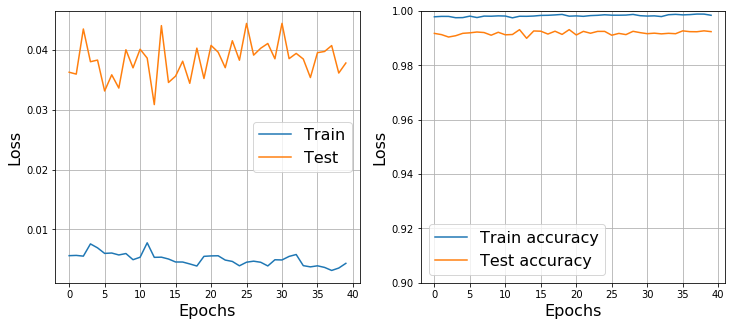

In [173]:
train(network, optimizer, 40)

#### Feedback (опционально)

Здесь вы можете оставить список опечаток из лекции или семинара:

Здесь вы можете оставить комментарии по лекции или семинару: